In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm

from energy_consumption.feature_selection.extract import extract_energy_data, extract_all_features
from energy_consumption.help_functions import get_forecast_timestamps, create_submission_frame
from energy_consumption.feature_selection.clean.impute_outliers import impute_outliers

In [3]:
from energy_consumption.feature_selection.extract.extract_energy_data import get_data
energydata = get_data()

100%|██████████| 364/364 [04:00<00:00,  1.51it/s]


In [4]:
energydata_knn = extract_all_features.get_energy_and_standardized_features2(energydf=energydata, knn=True)

2017-02-06 00:00:00
2024-01-25 12:00:00


In [5]:
y = energydata_knn[['energy_consumption']]
X = energydata_knn.drop(columns=['energy_consumption'])
X.columns

Index(['sun_hours', 'tavg', 'wspd', 'index', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'year_2016',
       'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021',
       'year_2022', 'year_2023', 'year_2024', 'holiday'],
      dtype='object')

Nehme k=13 (Trade-Off Varianz und Sharpness)

In [6]:
# Perform time series split
indexes = list(range(100))

residuals = pd.DataFrame()
distances = pd.DataFrame()
for i in indexes:
    residuals[f'{i}'] = np.nan
    distances[f'{i}'] = np.nan

for i in range(2,250):
        
    print(f'start of iteration {i}')
    
    # 168 = number of observations in one week, take latest obersvations for model training
    X_train, X_test = X[:-i*168], X[-i*168:-i*168+100]
    y_train, y_test = y[:-i*168], y[-i*168:-i*168+100]
    y_test = np.array(y_test['energy_consumption'])

    # Create a KNeighborsRegressor instance
    knn_model = KNeighborsRegressor(
        n_neighbors=13, weights='distance')  # adjust
    knn_model.fit(X_train, y_train)

    # estimate forecast means
    mean_est = knn_model.predict(X_test).flatten()

    # residuals based on horizon
    residuals_est = y_test-mean_est

    # safe
    residuals.loc[len(residuals)] = residuals_est

    neigh_dist, neigh_ind = knn_model.kneighbors(X_test, 13)
    distances.loc[len(distances)] = np.mean(neigh_dist, axis=1)

residuals
distances

start of iteration 2


c:\Users\Maria\Documents\Setups\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Maria\Documents\Setups\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Maria\Documents\Setups\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria\Documents\Setups\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Maria\Documents\Setups\Lib\subprocess.py", line 1538, in _execute_child
    h

start of iteration 3
start of iteration 4
start of iteration 5
start of iteration 6
start of iteration 7
start of iteration 8
start of iteration 9
start of iteration 10
start of iteration 11
start of iteration 12
start of iteration 13
start of iteration 14
start of iteration 15
start of iteration 16
start of iteration 17
start of iteration 18
start of iteration 19
start of iteration 20
start of iteration 21
start of iteration 22
start of iteration 23
start of iteration 24
start of iteration 25
start of iteration 26
start of iteration 27
start of iteration 28
start of iteration 29
start of iteration 30
start of iteration 31
start of iteration 32
start of iteration 33
start of iteration 34
start of iteration 35
start of iteration 36
start of iteration 37
start of iteration 38
start of iteration 39
start of iteration 40
start of iteration 41
start of iteration 42
start of iteration 43
start of iteration 44
start of iteration 45
start of iteration 46
start of iteration 47
start of iteratio

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,...,1.837084,1.837084,1.837084,1.837084,1.837084,1.837084,1.837084,1.837084,1.837084,1.837084
1,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,...,2.033275,2.033275,2.033275,2.033275,2.033275,2.033275,2.033275,2.033275,2.033275,2.033275
2,1.187781,1.187781,1.187781,1.187781,1.187781,1.187781,1.187781,1.187781,1.187781,1.187781,...,1.713741,1.713741,1.713741,1.713741,1.713741,1.713741,1.713741,1.713741,1.713741,1.713741
3,1.364116,1.364116,1.364116,1.364116,1.364116,1.364116,1.364116,1.364116,1.364116,1.364116,...,1.980459,1.980459,1.980459,1.980459,1.980459,1.980459,1.980459,1.980459,1.980459,1.980459
4,1.341317,1.341317,1.341317,1.341317,1.341317,1.341317,1.341317,1.341317,1.341317,1.341317,...,1.509900,1.509900,1.509900,1.509900,1.509900,1.509900,1.524193,1.524193,1.524193,1.524193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1.262334,1.262334,1.262334,1.262334,1.262334,1.262334,1.262334,1.262334,1.262334,1.262334,...,1.461192,1.461192,1.461192,1.461192,1.461192,1.461192,1.461192,1.461192,1.461192,1.461192
244,1.346612,1.346612,1.346612,1.346612,1.346612,1.346612,1.346612,1.346612,1.346612,1.346612,...,1.488737,1.488737,1.488737,1.488737,1.488737,1.488737,1.508143,1.508143,1.508143,1.508143
245,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,1.382351,...,1.790473,1.790473,1.790473,1.790473,1.790473,1.790473,1.790473,1.790473,1.790473,1.790473
246,1.323807,1.323807,1.323807,1.323807,1.323807,1.323807,1.323807,1.323807,1.323807,1.323807,...,1.220848,1.220848,1.220848,1.220848,1.220848,1.220848,1.220848,1.220848,1.220848,1.220848


In [ ]:
residuals

In [ ]:
row_means = neigh_dist.mean(axis=1)
row_means

In [7]:
list_names = []
for i in indexes: 
    name = f'index_{i}'
    list_names.append(name)
residuals.rename(columns=dict(
    zip(residuals.columns,list_names)), inplace=True)

distances_means = distances.mean(axis=0)
simulated_distances = pd.DataFrame({'index': indexes, 'mean_distance': distances_means})

# export residuals to avoid additional computational effort
residuals.to_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\data\\residuals_latest_250.csv', index=False)


# export distances to avoid additional computational effort
simulated_distances.to_csv(
     'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\data\\distances_latest_250.csv', index=False)

In [8]:
# import residuals to avoid additional computational effort
simulated_residuals = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\data\\residuals_latest_250.csv')
# import distances to avoid additional computational effort
simulated_distances = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\data\\distances_latest_250.csv')

In [9]:
residuals_means = simulated_residuals.mean()
residuals_variances = simulated_residuals.var()
residuals_variances
df_descriptive = pd.DataFrame({'mean': residuals_means,
                               'variance': residuals_variances})
df_descriptive # zeigt: trend nach unten

,mean,variance
index_0,9.174828,5.343884
index_1,8.209727,5.207033
index_2,7.541517,5.097505
index_3,7.083639,5.156305
index_4,7.682863,6.499516
...,...,...
index_95,-0.657732,16.931458
index_96,-1.004839,15.438433
index_97,-1.455590,14.552014
index_98,-1.578097,13.863136


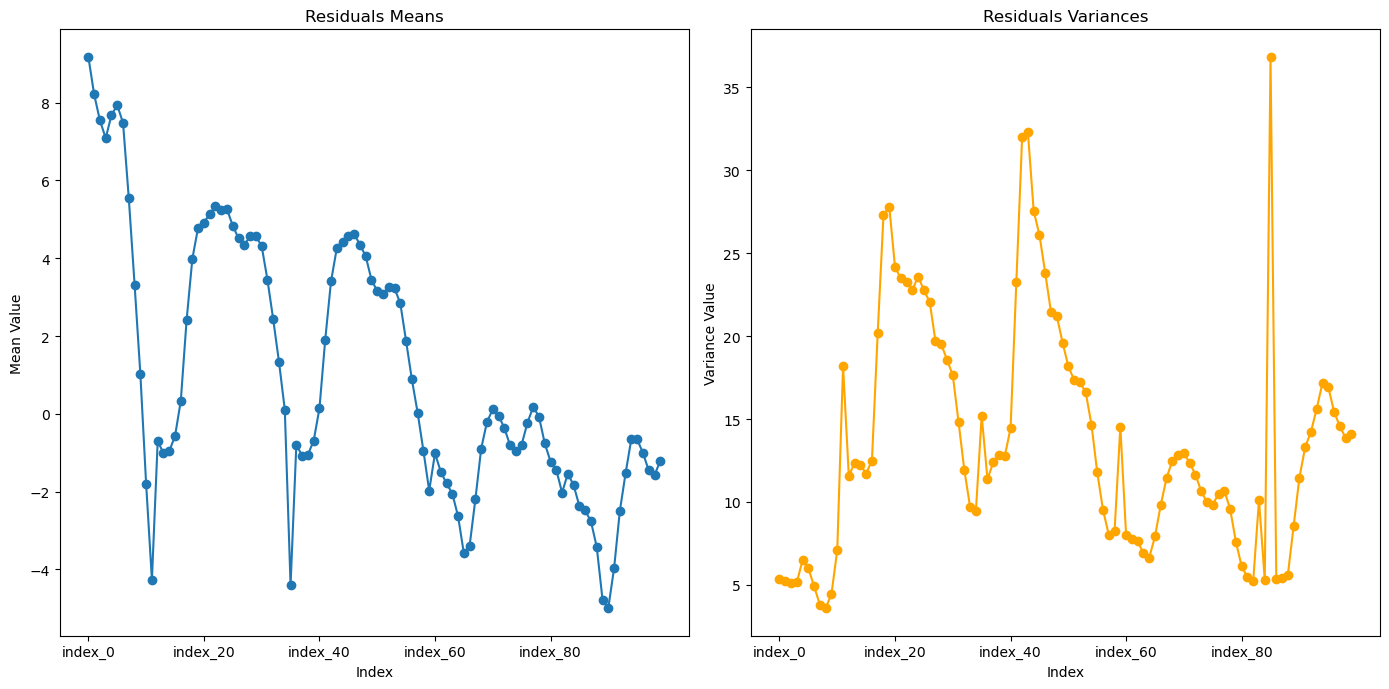

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a data frame from the calculated means and variances
characteristics_df = pd.DataFrame(
    {'Means': residuals_means, 'Variances': residuals_variances})

# Plotting
plt.figure(figsize=(14, 7))  # Adjusted the figure size for better visibility

# Plot Means
plt.subplot(1, 2, 1)
# Use plt.plot() for lines
plt.plot(characteristics_df.index, characteristics_df['Means'], marker='o')
plt.title('Residuals Means')
plt.xlabel('Index')
plt.ylabel('Mean Value')
# Set x-axis ticks with a step of 10
plt.xticks(characteristics_df.index[::(len(characteristics_df) // 5)])

# Plot Variances
plt.subplot(1, 2, 2)
# Use plt.plot() for lines
plt.plot(characteristics_df.index,
         characteristics_df['Variances'], color='orange', marker='o')
plt.title('Residuals Variances')
plt.xlabel('Index')
plt.ylabel('Variance Value')
plt.xticks(characteristics_df.index[::(len(characteristics_df) // 5)])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Residuenanalyse zeigt: Trends am Tag werden nicht aufgefasst, obwohl hour --> Kann aber sehr gut über Korrektur der Forecasts über Residuen aufgefasst werden
- Damit beides integriert: SChwankungen am Tag und langfristige Trends 

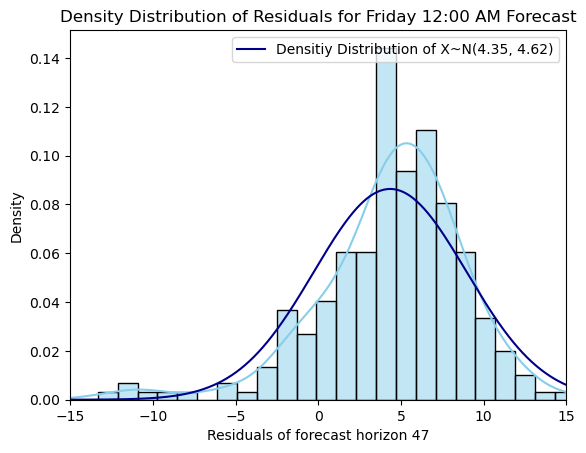

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Your existing data
array_47 = np.array(residuals.iloc[:, 47])
std_47 = round(np.std(residuals.iloc[:, 47]), 2)
mean_47 = round(np.mean(residuals.iloc[:, 47]), 2)

# Create a density plot using seaborn
sns.histplot(array_47, kde=True, stat="density", color="skyblue", bins=30)

# Add labels and title
plt.xlabel('Residuals of forecast horizon 47')
plt.xlim(-15, 15)
plt.ylabel('Density')
plt.title('Density Distribution of Residuals for Friday 12:00 AM Forecast')

# Plot standard normal distribution (mean=0, std=1)
x = np.linspace(-15, 15, 1000)
plt.plot(x, norm.pdf(x, mean_47, std_47),
         label=f'Densitiy Distribution of X~N({mean_47}, {std_47})', color='darkblue')

# Show legend
plt.legend()

# Show the plot
plt.show()

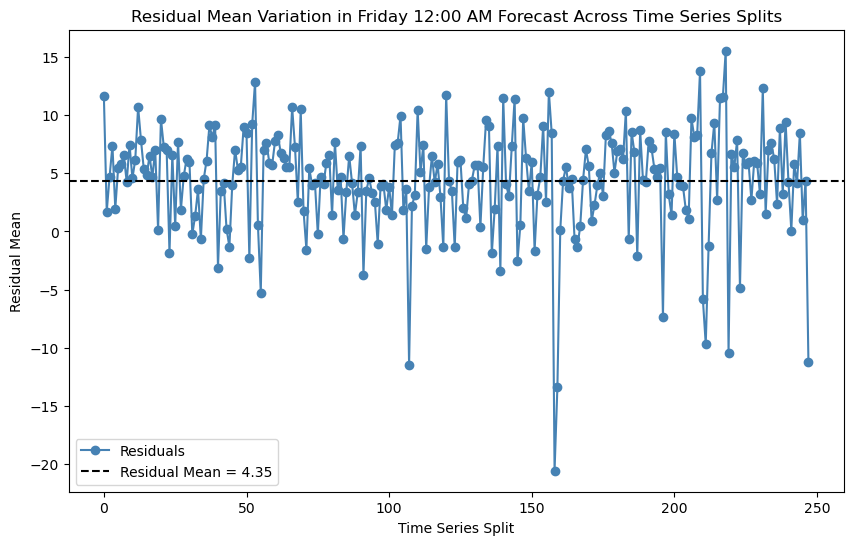

In [13]:
# check if residuals vary over time: 
import matplotlib.pyplot as plt

# Calculate the mean of each row
residual_ind = residuals.iloc[:, 47]
mean_47 = round(np.mean(residuals.iloc[:, 47]), 2)

# Plot the mean values
plt.figure(figsize=(10, 6))
plt.plot(residuals.index, residual_ind, marker='o', linestyle='-',
         color='steelblue', label='Residuals')
# Add a horizontal line for the mean
plt.axhline(y=mean_47, color='black', linestyle='--', label=f'Residual Mean = {mean_47}')
plt.title(
    'Residual Mean Variation in Friday 12:00 AM Forecast Across Time Series Splits')
plt.xlabel('Time Series Split')
plt.ylabel('Residual Mean')
plt.legend()
plt.show()

Interpretation: Klare Abweichung nach oben, da 'Stundentrend' nicht berücksichtigt, dennoch nicht abhängig von Time T

Absolute Evaluation 

In [14]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

from energy_consumption.feature_selection.extract import extract_energy_data, extract_all_features
from energy_consumption.help_functions.drop_years import drop_years
from energy_consumption.help_functions import get_forecast_timestamps, create_submission_frame

In [1]:
residuals = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\data\\residuals_latest_250.csv')
distances = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\data\\distances_latest_250.csv')


def get_quantiles(mean_est, neighbor_distances, indexes, quantiles):

    mean_est = np.array(mean_est)
    quantile_df = pd.DataFrame()

    # variance
    mean_residuals = np.array(residuals.mean(axis=0))
    std_dev_residuals = np.array(residuals.std(axis=0))
    mean_corr = np.array(mean_est) - mean_residuals
    mean_distance = np.array(neighbor_distances.mean(axis=1))
    distance_ratio = distances.iloc[i, 1]

    for i in indexes:
            # weighten percentiles by distance ration
        mean_distance = np.mean(neighbor_distances[i])
        distance_ratio = mean_distance/distances.iloc[i, 1]

        # estimate quantile
        name = f'index_{i}'
        quantile_df.loc[i] = np.array(
            mean_est[i] + distance_ratio*np.percentile(residuals[name], quantiles))


    for q in quantiles:
        quantile_df[f'q{q}'] = mean_corr + \
                std_dev_residuals*norm.ppf(q, loc=0) 

    return quantile_df

NameError: name 'pd' is not defined

In [21]:
from math import sqrt

residuals = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\data\\residuals_latest_250.csv')
distances = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\data\\distances_latest_250.csv')

def get_quantiles(mean_est, neighbor_distances, quantiles):

    quantile_df = pd.DataFrame()
    quantiles = (np.array(quantiles))

    mean_distances = np.array(distances['mean_distance'])
    distance_specific = neighbor_distances.mean(axis=1)  
    distance_ratio = (distance_specific/mean_distances)#durch?

    mean_residuals = np.array(residuals.mean(axis=0))
    mean_corr = np.array(mean_est) - mean_residuals
    std_dev_residuals = np.sqrt(np.array((residuals.var(
        axis=0)) * (200 / (200 - 54))))  # estimate std --> take 1/(N-K), N = 200, K = 54

    for q in quantiles:
            quantile_df[f'q{q}'] = mean_corr+norm.ppf(q, loc=0)*(distance_ratio*std_dev_residuals + sqrt(1.0417))
        
    return quantile_df

In [22]:
def get_KNNRegression_forecasts(energydata=np.nan, indexes=[47, 51, 55, 71, 75, 79], quantiles=[0.025, 0.25, 0.5, 0.75, 0.975], periods=100, abs_eval = False):

    if type(energydata) == float:
        # use derived optimum for number of years
        energydata = extract_energy_data.get_data(num_years=7) # change to 7

    energydata = extract_all_features.get_energy_and_standardized_features2(
        energydata, knn=True)

    X = energydata.drop(columns=['energy_consumption'])
    y = energydata['energy_consumption']

    # create dataframe to store forecast quantiles
    energyforecast = get_forecast_timestamps.forecast_timestamps(
        energydata.index[-1])

    X_pred = extract_all_features.get_energy_and_standardized_features2(
        energyforecast, knn=True)

    X, X_pred = drop_years(X, X_pred)

    # fit KNNRegression with best k
    knn_model = KNeighborsRegressor(n_neighbors=13, weights='distance')

    # Fit the model on the scaled data
    knn_model.fit(X, y)

    # estimate forecast mean
    mean_est = knn_model.predict(X_pred)
    neighbor_distances, neighbor_indizes = knn_model.kneighbors(X_pred, 13)

    # estimate quantile forecasts
    quantile_forecasts = get_quantiles(
        mean_est, neighbor_distances, quantiles).iloc[indexes]

    # return quantile forecasts in terms of absolute evaluation
    if abs_eval == True:
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        quantile_forecasts.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return quantile_forecasts

    # else: create submission frame
    else:
        forecast_frame = create_submission_frame.get_frame(
            quantile_forecasts, indexes)
        forecast_frame = forecast_frame.drop(columns={'index'})
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        forecast_frame.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return forecast_frame

In [27]:
nd = get_KNNRegression_forecasts(energydata, indexes = list(range(20)), quantiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], abs_eval = True)
nd

2017-02-06 00:00:00
2024-01-25 12:00:00
2024-01-24 13:00:00
2024-01-29 16:00:00


,date_time,q0.1,q0.2,q0.3,q0.4,q0.5,q0.6,q0.7,q0.8,q0.9
0,2024-01-24 13:00:00,49.378236,51.888192,53.698047,55.244501,56.689934,58.135368,59.681822,61.491677,64.001633
1,2024-01-24 14:00:00,52.201388,54.538186,56.223182,57.662949,59.008665,60.354380,61.794147,63.479143,65.815941
2,2024-01-24 15:00:00,52.610684,54.921677,56.588066,58.011934,59.342789,60.673644,62.097512,63.763901,66.074894
3,2024-01-24 16:00:00,52.764540,55.095058,56.775525,58.211422,59.553521,60.895619,62.331516,64.011983,66.342501
4,2024-01-24 17:00:00,50.232049,52.888230,54.803524,56.440072,57.969714,59.499356,61.135904,63.051197,65.707379
5,2024-01-24 18:00:00,50.342074,53.039364,54.984300,56.646176,58.199491,59.752807,61.414683,63.359619,66.056909
6,2024-01-24 19:00:00,50.322187,52.977966,54.892969,56.529269,58.058679,59.588089,61.224388,63.139391,65.795170
7,2024-01-24 20:00:00,51.480549,53.741979,55.372630,56.765961,58.068274,59.370587,60.763917,62.394568,64.655999
8,2024-01-24 21:00:00,53.124762,55.006500,56.363365,57.522757,58.606412,59.690067,60.849459,62.206324,64.088062
9,2024-01-24 22:00:00,53.753182,55.758561,57.204581,58.440152,59.595010,60.749868,61.985439,63.431459,65.436839


In [23]:
pit_merged = pd.DataFrame(columns=['date_time', 'q0.1', 'q0.2', 'q0.3', 'q0.4', 'q0.5', 'q0.6',
                                   'q0.7', 'q0.8', 'q0.9', 'energy_consumption'])
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in range(1, 8):
    print(f'start of round {i}')
    forecasts = get_KNNRegression_forecasts(energydata[:i*(-168)],
                                       indexes=list(range(100)),
                                       quantiles=quantiles, abs_eval=True)
    obs = energydata[i*(-168):i*(-168)+100].reset_index()
    forecasts_obs = forecasts.merge(obs, how='left', on='date_time')
    pit_merged = pd.concat([pit_merged, forecasts_obs])

start of round 1
2017-02-06 00:00:00
2024-01-18 12:00:00
2024-01-17 13:00:00
2024-01-22 16:00:00
start of round 2
2017-02-06 00:00:00
2024-01-11 12:00:00
2024-01-10 13:00:00
2024-01-15 16:00:00
start of round 3
2017-02-06 00:00:00
2024-01-04 12:00:00
2024-01-03 13:00:00
2024-01-08 16:00:00
start of round 4
2017-02-06 00:00:00
2023-12-28 12:00:00
2023-12-27 13:00:00
2024-01-01 16:00:00
start of round 5
2017-02-06 00:00:00
2023-12-21 12:00:00
2023-12-20 13:00:00
2023-12-25 16:00:00
start of round 6
2017-02-06 00:00:00
2023-12-14 12:00:00
2023-12-13 13:00:00
2023-12-18 16:00:00
start of round 7
2017-02-06 00:00:00
2023-12-07 12:00:00
2023-12-06 13:00:00
2023-12-11 16:00:00


In [24]:
pit_merged

,date_time,q0.1,q0.2,q0.3,q0.4,q0.5,q0.6,q0.7,q0.8,q0.9,energy_consumption
0,2024-01-17 13:00:00,53.773626,56.079511,57.742216,59.162936,60.490849,61.818763,63.239483,64.902188,67.208073,71.60325
1,2024-01-17 14:00:00,53.666957,55.948911,57.594361,59.000337,60.314469,61.628601,63.034578,64.680027,66.961982,70.62675
2,2024-01-17 15:00:00,53.908144,56.170718,57.802193,59.196229,60.499200,61.802171,63.196207,64.827682,67.090256,69.26850
3,2024-01-17 16:00:00,54.721231,56.994235,58.633231,60.033692,61.342670,62.651648,64.052109,65.691105,67.964109,69.43150
4,2024-01-17 17:00:00,55.963601,58.460445,60.260845,61.799220,63.237103,64.674985,66.213360,68.013760,70.510604,71.15625
...,...,...,...,...,...,...,...,...,...,...,...
95,2023-12-10 12:00:00,40.968824,45.008104,47.920709,50.409422,52.735563,55.061704,57.550417,60.463022,64.502302,55.40900
96,2023-12-10 13:00:00,40.857627,44.725716,47.514881,49.898119,52.125674,54.353230,56.736468,59.525632,63.393721,53.57775
97,2023-12-10 14:00:00,40.812789,44.581272,47.298613,49.620481,51.790675,53.960869,56.282737,59.000078,62.768561,52.50025
98,2023-12-10 15:00:00,40.962707,44.651667,47.311667,49.584538,51.708937,53.833335,56.106207,58.766206,62.455166,52.27550


In [25]:
def find_first_quantile(row):
    quantile_columns = [f'q{quantile}' for quantile in quantiles]
    for quantile_col in quantile_columns:
        if row['energy_consumption'] < row[quantile_col]:
            return quantile_col
    return 'q1'


# Apply the function to each row
pit_merged['first_quantile'] = pit_merged.apply(find_first_quantile, axis=1)
quantile_counts = pit_merged['first_quantile'].value_counts()

# order quantiles for final plot
ordered_quantile_counts = {}
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for q in quantiles:
    if f'q{q}' in quantile_counts.index:
        ordered_quantile_counts[q] = quantile_counts.loc[f'q{q}']
    else:
        ordered_quantile_counts[q] = 0

ordered_quantile_counts

{0.1: 41,
 0.2: 79,
 0.3: 67,
 0.4: 61,
 0.5: 77,
 0.6: 66,
 0.7: 46,
 0.8: 82,
 0.9: 113,
 1: 68}

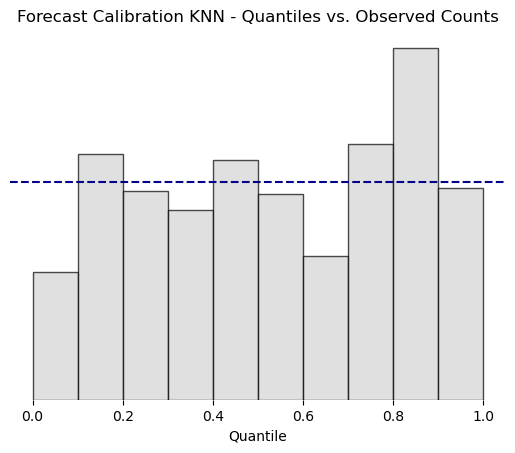

In [27]:
import matplotlib.pyplot as plt 

counts = list(ordered_quantile_counts.values())
bar_width = 0.1

# Calculate the mean of the y-values
mean_value = sum(counts) / len(counts)

quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# Centering the bars on the left-hand side of their ticks
plt.bar([q - bar_width for q in quantiles], counts,
        width=bar_width, color='lightgrey', alpha=0.7, align='edge', edgecolor='black')
plt.xlabel('Quantile')
plt.yticks([])
# Alternatively: observed counts in each quantile range
plt.title('Forecast Calibration KNN - Quantiles vs. Observed Counts')

# Plot mean
plt.axhline(y=mean_value, color='darkblue', linestyle='--', label='Mean')

plt.box(False)
plt.show()

Do the same with new data

In [1]:
from energy_consumption.feature_selection.extract import extract_energy_data
energydata = extract_energy_data.get_data()

100%|██████████| 364/364 [04:11<00:00,  1.45it/s]


In [9]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm

residuals = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\residuals.csv')
distances = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\distances.csv')


def get_quantiles(mean_est, neighbor_distances, quantiles):

    quantile_df = pd.DataFrame()
    quantiles = (np.array(quantiles))

    mean_distances = np.array(distances['mean_distance'])
    distance_specific = neighbor_distances.mean(axis=1)
    distance_ratio = (distance_specific/mean_distances)  # durch?

    mean_residuals = np.array(residuals.mean(axis=0))
    mean_corr = np.array(mean_est) - mean_residuals

    std_dev_residuals = np.array(residuals.std(axis=0))
    for q in quantiles:#chanted to mean est
        quantile_df[f'q{q}'] = mean_est+distance_ratio*norm.ppf(q, loc=0)*std_dev_residuals*(0.75)

    return quantile_df

In [4]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

from energy_consumption.feature_selection.extract import extract_energy_data, extract_all_features
from energy_consumption.help_functions.drop_years import drop_years
from energy_consumption.help_functions import get_forecast_timestamps, create_submission_frame


def get_KNNRegression_forecasts(energydata=np.nan, indexes=[47, 51, 55, 71, 75, 79], quantiles=[0.025, 0.25, 0.5, 0.75, 0.975], periods=100, abs_eval=False):

    if type(energydata) == float:
        # use derived optimum for number of years
        energydata = extract_energy_data.get_data(
            num_years=0.25)  # change to 7

    energydata = extract_all_features.get_energy_and_standardized_features2(
        energydata, knn=True)

    X = energydata.drop(columns=['energy_consumption'])
    y = energydata['energy_consumption']

    # create dataframe to store forecast quantiles
    energyforecast = get_forecast_timestamps.forecast_timestamps(
        energydata.index[-1])

    X_pred = extract_all_features.get_energy_and_standardized_features2(
        energyforecast, knn=True)

    X, X_pred = drop_years(X, X_pred)

    # fit KNNRegression with best k
    knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')

    # Fit the model on the scaled data
    knn_model.fit(X, y)

    # estimate forecast mean
    mean_est = knn_model.predict(X_pred)
    neighbor_distances, neighbor_indizes = knn_model.kneighbors(X_pred, 5)

    # estimate quantile forecasts
    quantile_forecasts = get_quantiles(
        mean_est, neighbor_distances, quantiles).iloc[indexes]

    # return quantile forecasts in terms of absolute evaluation
    if abs_eval == True:
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        quantile_forecasts.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return quantile_forecasts

    # else: create submission frame
    else:
        forecast_frame = create_submission_frame.get_frame(
            quantile_forecasts, indexes)
        forecast_frame = forecast_frame.drop(columns={'index'})
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        forecast_frame.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return forecast_frame

In [10]:
pit_merged = pd.DataFrame(columns=['date_time', 'q0.1', 'q0.2', 'q0.3', 'q0.4', 'q0.5', 'q0.6',
                                   'q0.7', 'q0.8', 'q0.9', 'energy_consumption'])
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# extend range to get more accurate results
for i in range(1, 8):
    print(f'start of round {i}')
    forecasts = get_KNNRegression_forecasts(energydata[:i*-168],
                                    indexes=list(range(80)),
                                    quantiles=quantiles, abs_eval=True)
    obs = energydata[i*(-168):i*(-168)+80].reset_index()
    forecasts_obs = forecasts.merge(obs, how='left', on='date_time')
    pit_merged = pd.concat([pit_merged, forecasts_obs])

# Insert a column 'q1' with inf values after 'q0.9'
column_index = pit_merged.columns.get_loc('q0.9') + 1
if 'q1' not in pit_merged.columns:
    pit_merged.insert(column_index, 'q1', float('inf'))

start of round 1
2017-02-06 00:00:00
2024-01-11 12:00:00
2024-01-10 13:00:00
2024-01-15 16:00:00
start of round 2
2017-02-06 00:00:00
2024-01-04 12:00:00
2024-01-03 13:00:00
2024-01-08 16:00:00
start of round 3
2017-02-06 00:00:00
2023-12-28 12:00:00
2023-12-27 13:00:00
2024-01-01 16:00:00
start of round 4
2017-02-06 00:00:00
2023-12-21 12:00:00
2023-12-20 13:00:00
2023-12-25 16:00:00
start of round 5
2017-02-06 00:00:00
2023-12-14 12:00:00
2023-12-13 13:00:00
2023-12-18 16:00:00
start of round 6
2017-02-06 00:00:00
2023-12-07 12:00:00
2023-12-06 13:00:00
2023-12-11 16:00:00
start of round 7
2017-02-06 00:00:00
2023-11-30 12:00:00
2023-11-29 13:00:00
2023-12-04 16:00:00


In [11]:
def find_first_quantile(row):
    quantile_columns = [f'q{quantile}' for quantile in quantiles]
    for quantile_col in quantile_columns:
        if row['energy_consumption'] < row[quantile_col]:
            return quantile_col
    return 'q1'


# Apply the function to each row
pit_merged['first_quantile'] = pit_merged.apply(find_first_quantile, axis=1)
quantile_counts = pit_merged['first_quantile'].value_counts()

# order quantiles for final plot
ordered_quantile_counts = {}
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for q in quantiles:
    if f'q{q}' in quantile_counts.index:
        ordered_quantile_counts[q] = quantile_counts.loc[f'q{q}']
    else:
        ordered_quantile_counts[q] = 0

ordered_quantile_counts

{0.1: 90,
 0.2: 46,
 0.3: 49,
 0.4: 59,
 0.5: 69,
 0.6: 51,
 0.7: 28,
 0.8: 38,
 0.9: 82,
 1: 48}

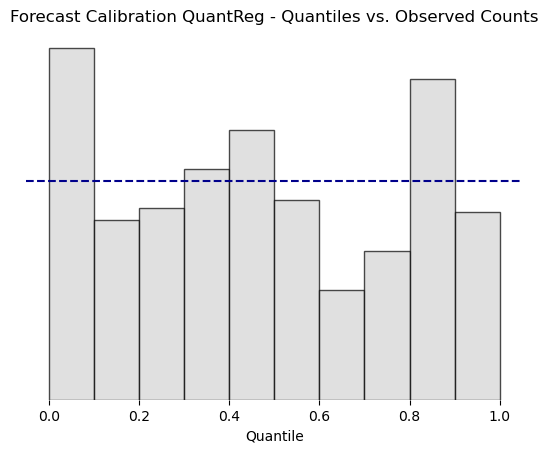

In [13]:
import matplotlib.pyplot as plt


def find_first_quantile(row):
    quantile_columns = [f'q{quantile}' for quantile in quantiles]
    for quantile_col in quantile_columns:
        if row['energy_consumption'] < row[quantile_col]:
            return quantile_col
    return 'q1'


# Apply the function to each row
pit_merged['first_quantile'] = pit_merged.apply(find_first_quantile, axis=1)
quantile_counts = pit_merged['first_quantile'].value_counts()

# order quantiles for final plot
ordered_quantile_counts = {}
for q in quantiles:
    if f'q{q}' in quantile_counts.index:
        ordered_quantile_counts[q] = quantile_counts.loc[f'q{q}']

counts = list(ordered_quantile_counts.values())
bar_width = 0.1

quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Calculate the mean of the y-values
mean_value = sum(counts) / len(counts)

# Plot mean
plt.axhline(y=mean_value, color='darkblue', linestyle='--', label='Mean')
# Centering the bars on the left-hand side of their ticks
plt.bar([q - bar_width for q in quantiles], counts,
        width=bar_width, color='lightgrey', alpha=0.7, align='edge', edgecolor='black')
plt.xlabel('Quantile')
plt.yticks([])
# Alternatively: observed counts in each quantile range
plt.title('Forecast Calibration QuantReg - Quantiles vs. Observed Counts')
plt.box(False)
plt.show()

In [ ]:
# Perform time series split
indexes = list(range(100))

residuals = pd.DataFrame()
distances = pd.DataFrame()
for i in indexes:
    residuals[f'{i}'] = np.nan
    distances[f'{i}'] = np.nan

for i in range(2, 200):

    print(f'start of iteration {i}')

    # 168 = number of observations in one week, take latest obersvations for model training
    X_train, X_test = X[:-i*168], X[-i*168:-i*168+100]
    y_train, y_test = y[:-i*168], y[-i*168:-i*168+100]
    y_test = np.array(y_test['energy_consumption'])

    # Create a KNeighborsRegressor instance
    knn_model = KNeighborsRegressor(
        n_neighbors=13, weights='distance')  # adjust
    knn_model.fit(X_train, y_train)

    # estimate forecast means
    mean_est = knn_model.predict(X_test).flatten()

    # residuals based on horizon
    residuals_est = y_test-mean_est

    # safe
    residuals.loc[len(residuals)] = residuals_est

    neigh_dist, neigh_ind = knn_model.kneighbors(X_test, 13)
    distances.loc[len(distances)] = np.mean(neigh_dist, axis=1)

residuals
distances